# Credit Card Routing for Online Purchase via Predictive Modelling

# Introduction 

This project aims to help the business to automate the credit card routing via a predictive model. Such a model should increase the payment success rate by finding the best possible PSP for each transaction and at the same time keep the transaction fees low.

Column Description:
- tmsp: timestamp of transaction
- country: country of transaction
- amount: transaction amount
- success: is 1 if payment is successful
- PSP: name of payments service provider
- 3D_secured: is 1 if customer is 3D identified (i.e. more secure online credit card payments)
- card: credit card provider (Master, Visa, Diners)

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import date
import datetime 
import calendar


%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing Dataset

In [2]:
df = pd.read_excel ('PSP_Jan_Feb_2019.xlsx')

In [3]:
df.head()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


# Understanding Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  50410 non-null  int64         
 1   tmsp        50410 non-null  datetime64[ns]
 2   country     50410 non-null  object        
 3   amount      50410 non-null  int64         
 4   success     50410 non-null  int64         
 5   PSP         50410 non-null  object        
 6   3D_secured  50410 non-null  int64         
 7   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.1+ MB


In [5]:
df['country'].value_counts()

Germany        30233
Switzerland    10338
Austria         9839
Name: country, dtype: int64

In [6]:
df['success'].value_counts()

0    40182
1    10228
Name: success, dtype: int64

In [7]:
df['PSP'].value_counts()

UK_Card       26459
Simplecard    12446
Moneycard      8297
Goldcard       3208
Name: PSP, dtype: int64

In [8]:
df['3D_secured'].value_counts()

0    38399
1    12011
Name: 3D_secured, dtype: int64

In [9]:
df['card'].value_counts()

Master    29002
Visa      11640
Diners     9768
Name: card, dtype: int64

In [10]:
df.drop(['Unnamed: 0'], inplace=True, axis = 1)

In [11]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [12]:
df['success'] = df['success'].astype(bool)   # Transform to boolen
df['3D_secured'] = df['3D_secured'].astype(bool)   # Transform to boolen

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  bool          
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  bool          
 6   card        50410 non-null  object        
dtypes: bool(2), datetime64[ns](1), int64(1), object(3)
memory usage: 2.0+ MB


In [14]:
df.describe()

,amount
count,50410.000000
mean,202.395715
std,96.274730
min,6.000000
25%,133.000000
50%,201.000000
75%,269.000000
max,630.000000


# Data Cleansing

In [15]:
df.duplicated().sum()

81

In [16]:
# High Advanced Exploration to find unique data in each column
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is: {df[col].value_counts()}')
    
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col tmsp is : ['2019-01-01T00:01:11.000000000' '2019-01-01T00:01:17.000000000'
 '2019-01-01T00:02:49.000000000' ... '2019-02-28T23:47:04.000000000'
 '2019-02-28T23:47:36.000000000' '2019-02-28T23:48:19.000000000']
---------------------------------------------------------------------------
Details of the particular col country is : ['Germany' 'Austria' 'Switzerland']
---------------------------------------------------------------------------
Details of the particular col amount is : [ 89 238 124 282 117 174 232 268 205 111 277 137 148 394  84  34 324 251
 100 221 340 257 193  36 146 192  14 175 270 256 310 239  37  56 105 228
 322 367 190 186 121 274 264 132 279 104 184 258 209 260 383 109 161 127
 233 129 243 131 225 246 126  82 329 335 173 222 181  85  62 291 107  78
  22 164 203 113 379 224 242  45 158 140  13 197 215 151 208 116 263 136
 211 180 125 247 376 162 355 135 188  38 144  23 202 212 273 230 141 293
 336 163 350 374 176 218  53 267 255 216 450 301 

In [17]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
50405     True
50406    False
50407    False
50408    False
50409    False
Length: 50410, dtype: bool

In [18]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,tmsp,country,amount,success,PSP,3D_secured,card
84,2019-01-01 01:28:02,Germany,37,False,UK_Card,False,Master
496,2019-01-01 09:35:38,Germany,170,False,UK_Card,False,Diners
500,2019-01-01 09:44:27,Germany,113,False,UK_Card,False,Visa
603,2019-01-01 11:32:44,Germany,170,False,UK_Card,False,Visa
1393,2019-01-02 03:06:14,Austria,229,False,UK_Card,False,Master
...,...,...,...,...,...,...,...
49517,2019-02-27 21:50:28,Germany,186,False,UK_Card,False,Visa
49809,2019-02-28 06:10:53,Germany,29,False,UK_Card,False,Master
50329,2019-02-28 21:36:07,Switzerland,161,False,UK_Card,False,Visa
50399,2019-02-28 23:33:01,Germany,208,False,UK_Card,False,Master


In [19]:
df.isnull().sum()

tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [20]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,False,UK_Card,False,Visa
1,2019-01-01 00:01:17,Germany,89,True,UK_Card,False,Visa
2,2019-01-01 00:02:49,Germany,238,False,UK_Card,True,Diners
3,2019-01-01 00:03:13,Germany,238,True,UK_Card,True,Diners
4,2019-01-01 00:04:33,Austria,124,False,Simplecard,False,Diners


## Features Engineering

In [21]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,False,UK_Card,False,Visa
1,2019-01-01 00:01:17,Germany,89,True,UK_Card,False,Visa
2,2019-01-01 00:02:49,Germany,238,False,UK_Card,True,Diners
3,2019-01-01 00:03:13,Germany,238,True,UK_Card,True,Diners
4,2019-01-01 00:04:33,Austria,124,False,Simplecard,False,Diners


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  bool          
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  bool          
 6   card        50410 non-null  object        
dtypes: bool(2), datetime64[ns](1), int64(1), object(3)
memory usage: 2.0+ MB


In [23]:
df['hour'] = df['tmsp'].dt.hour

In [24]:
df['dayname']=df['tmsp'].dt.day_name()
df['monthname']=df['tmsp'].dt.month_name()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  bool          
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  bool          
 6   card        50410 non-null  object        
 7   hour        50410 non-null  int64         
 8   dayname     50410 non-null  object        
 9   monthname   50410 non-null  object        
dtypes: bool(2), datetime64[ns](1), int64(2), object(5)
memory usage: 3.2+ MB


In [26]:
df.sample()

,tmsp,country,amount,success,PSP,3D_secured,card,hour,dayname,monthname
492,2019-01-01 09:34:43,Germany,170,False,UK_Card,False,Diners,9,Tuesday,January


In [27]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,hour,dayname,monthname
0,2019-01-01 00:01:11,Germany,89,False,UK_Card,False,Visa,0,Tuesday,January
1,2019-01-01 00:01:17,Germany,89,True,UK_Card,False,Visa,0,Tuesday,January
2,2019-01-01 00:02:49,Germany,238,False,UK_Card,True,Diners,0,Tuesday,January
3,2019-01-01 00:03:13,Germany,238,True,UK_Card,True,Diners,0,Tuesday,January
4,2019-01-01 00:04:33,Austria,124,False,Simplecard,False,Diners,0,Tuesday,January


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  bool          
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  bool          
 6   card        50410 non-null  object        
 7   hour        50410 non-null  int64         
 8   dayname     50410 non-null  object        
 9   monthname   50410 non-null  object        
dtypes: bool(2), datetime64[ns](1), int64(2), object(5)
memory usage: 3.2+ MB


In [29]:
df.sample(10)

,tmsp,country,amount,success,PSP,3D_secured,card,hour,dayname,monthname
16499,2019-01-19 04:14:52,Germany,159,True,UK_Card,False,Master,4,Saturday,January
23447,2019-01-28 13:25:31,Germany,50,False,UK_Card,False,Master,13,Monday,January
48062,2019-02-26 05:00:18,Germany,49,False,UK_Card,True,Master,5,Tuesday,February
32300,2019-02-06 18:24:12,Switzerland,205,False,UK_Card,False,Master,18,Wednesday,February
32413,2019-02-06 20:47:56,Germany,219,False,UK_Card,False,Master,20,Wednesday,February
19787,2019-01-23 11:06:20,Switzerland,135,True,Moneycard,False,Diners,11,Wednesday,January
31370,2019-02-05 20:28:46,Germany,38,False,UK_Card,True,Diners,20,Tuesday,February
876,2019-01-01 16:44:09,Germany,149,False,Goldcard,False,Master,16,Tuesday,January
32136,2019-02-06 14:00:19,Germany,106,False,UK_Card,True,Master,14,Wednesday,February
40219,2019-02-15 21:37:10,Germany,291,False,UK_Card,False,Visa,21,Friday,February


In [30]:
def hours(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif(x > 8) and (x <= 12):
        return 'Morning'
    elif(x > 12) and (x <= 16): 
        return 'Noon'
    elif(x > 16) and (x <= 20):
        return 'Evening'
    elif(x > 20) and (x <= 24):
        return 'Night'
    elif(x <= 4):
        return 'Late Night'
    
df['session'] = df['hour'].apply(hours)

In [31]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,hour,dayname,monthname,session
0,2019-01-01 00:01:11,Germany,89,False,UK_Card,False,Visa,0,Tuesday,January,Late Night
1,2019-01-01 00:01:17,Germany,89,True,UK_Card,False,Visa,0,Tuesday,January,Late Night
2,2019-01-01 00:02:49,Germany,238,False,UK_Card,True,Diners,0,Tuesday,January,Late Night
3,2019-01-01 00:03:13,Germany,238,True,UK_Card,True,Diners,0,Tuesday,January,Late Night
4,2019-01-01 00:04:33,Austria,124,False,Simplecard,False,Diners,0,Tuesday,January,Late Night


In [32]:
df['weekday']=df['tmsp'].dt.weekday

In [33]:
def daysw(x):
    if x < 5:
        return 0
    else:
        return 1
    
df['Weekend'] = df['weekday'].apply(daysw)

In [34]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,hour,dayname,monthname,session,weekday,Weekend
0,2019-01-01 00:01:11,Germany,89,False,UK_Card,False,Visa,0,Tuesday,January,Late Night,1,0
1,2019-01-01 00:01:17,Germany,89,True,UK_Card,False,Visa,0,Tuesday,January,Late Night,1,0
2,2019-01-01 00:02:49,Germany,238,False,UK_Card,True,Diners,0,Tuesday,January,Late Night,1,0
3,2019-01-01 00:03:13,Germany,238,True,UK_Card,True,Diners,0,Tuesday,January,Late Night,1,0
4,2019-01-01 00:04:33,Austria,124,False,Simplecard,False,Diners,0,Tuesday,January,Late Night,1,0


In [35]:
df['amount'].describe()

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
25%        133.000000
50%        201.000000
75%        269.000000
max        630.000000
Name: amount, dtype: float64

In [36]:
def amounts(x):
    if x <= 210:
        return 'Low'
    elif (x > 210) and (x <= 420):
        return 'Medium'
    elif ( x > 420) and (x <= 650):
        return 'High'
    
df['AmountLevel'] = df['amount'].apply(amounts)

In [37]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,hour,dayname,monthname,session,weekday,Weekend,AmountLevel
0,2019-01-01 00:01:11,Germany,89,False,UK_Card,False,Visa,0,Tuesday,January,Late Night,1,0,Low
1,2019-01-01 00:01:17,Germany,89,True,UK_Card,False,Visa,0,Tuesday,January,Late Night,1,0,Low
2,2019-01-01 00:02:49,Germany,238,False,UK_Card,True,Diners,0,Tuesday,January,Late Night,1,0,Medium
3,2019-01-01 00:03:13,Germany,238,True,UK_Card,True,Diners,0,Tuesday,January,Late Night,1,0,Medium
4,2019-01-01 00:04:33,Austria,124,False,Simplecard,False,Diners,0,Tuesday,January,Late Night,1,0,Low


In [38]:
# Fake data
name = ['MoneyCard','Goldcard','UK_Card','Simplecard']*2
succ = [True]*4 + [False]*4
df1 = pd.DataFrame(zip(name,succ),columns=['name','succ'])

# dictionary for success/fail
di_map = {'MoneyCard': [5,2],
          'Goldcard': [10,5],
          'UK_Card': [3,1],
          'Simplecard': [1,0.5]}

# assumes first is name, second is success
def fees(arg):
    if arg[1]:
        return di_map[arg[0]][0]
    else:
        return di_map[arg[0]][1]

# make sure to pass in correct order
df1['fees'] = df1[['name','succ']].apply(fees,axis=1)

In [39]:
df1
df1['index'] = df1['succ'].astype(str) +"-"+ df1["name"]
df1

,name,succ,fees,index
0,MoneyCard,True,5.0,True-MoneyCard
1,Goldcard,True,10.0,True-Goldcard
2,UK_Card,True,3.0,True-UK_Card
3,Simplecard,True,1.0,True-Simplecard
4,MoneyCard,False,2.0,False-MoneyCard
5,Goldcard,False,5.0,False-Goldcard
6,UK_Card,False,1.0,False-UK_Card
7,Simplecard,False,0.5,False-Simplecard


In [40]:
df.head()
df['index'] = df['success'].astype(str) +"-"+ df["PSP"]
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,hour,dayname,monthname,session,weekday,Weekend,AmountLevel,index
0,2019-01-01 00:01:11,Germany,89,False,UK_Card,False,Visa,0,Tuesday,January,Late Night,1,0,Low,False-UK_Card
1,2019-01-01 00:01:17,Germany,89,True,UK_Card,False,Visa,0,Tuesday,January,Late Night,1,0,Low,True-UK_Card
2,2019-01-01 00:02:49,Germany,238,False,UK_Card,True,Diners,0,Tuesday,January,Late Night,1,0,Medium,False-UK_Card
3,2019-01-01 00:03:13,Germany,238,True,UK_Card,True,Diners,0,Tuesday,January,Late Night,1,0,Medium,True-UK_Card
4,2019-01-01 00:04:33,Austria,124,False,Simplecard,False,Diners,0,Tuesday,January,Late Night,1,0,Low,False-Simplecard


In [41]:
merged_df = pd.merge(left=df, right=df1, left_on='index', right_on='index')
merged_df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,hour,dayname,monthname,session,weekday,Weekend,AmountLevel,index,name,succ,fees
0,2019-01-01 00:01:11,Germany,89,False,UK_Card,False,Visa,0,Tuesday,January,Late Night,1,0,Low,False-UK_Card,UK_Card,False,1.0
1,2019-01-01 00:02:49,Germany,238,False,UK_Card,True,Diners,0,Tuesday,January,Late Night,1,0,Medium,False-UK_Card,UK_Card,False,1.0
2,2019-01-01 00:06:41,Switzerland,282,False,UK_Card,False,Master,0,Tuesday,January,Late Night,1,0,Medium,False-UK_Card,UK_Card,False,1.0
3,2019-01-01 00:12:52,Austria,232,False,UK_Card,True,Diners,0,Tuesday,January,Late Night,1,0,Medium,False-UK_Card,UK_Card,False,1.0
4,2019-01-01 00:13:34,Austria,232,False,UK_Card,True,Diners,0,Tuesday,January,Late Night,1,0,Medium,False-UK_Card,UK_Card,False,1.0


In [42]:
merged_df.drop(columns=['hour','dayname','monthname','weekday','index','name','succ'],inplace=True)
merged_df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,session,Weekend,AmountLevel,fees
0,2019-01-01 00:01:11,Germany,89,False,UK_Card,False,Visa,Late Night,0,Low,1.0
1,2019-01-01 00:02:49,Germany,238,False,UK_Card,True,Diners,Late Night,0,Medium,1.0
2,2019-01-01 00:06:41,Switzerland,282,False,UK_Card,False,Master,Late Night,0,Medium,1.0
3,2019-01-01 00:12:52,Austria,232,False,UK_Card,True,Diners,Late Night,0,Medium,1.0
4,2019-01-01 00:13:34,Austria,232,False,UK_Card,True,Diners,Late Night,0,Medium,1.0


# Data Exploration

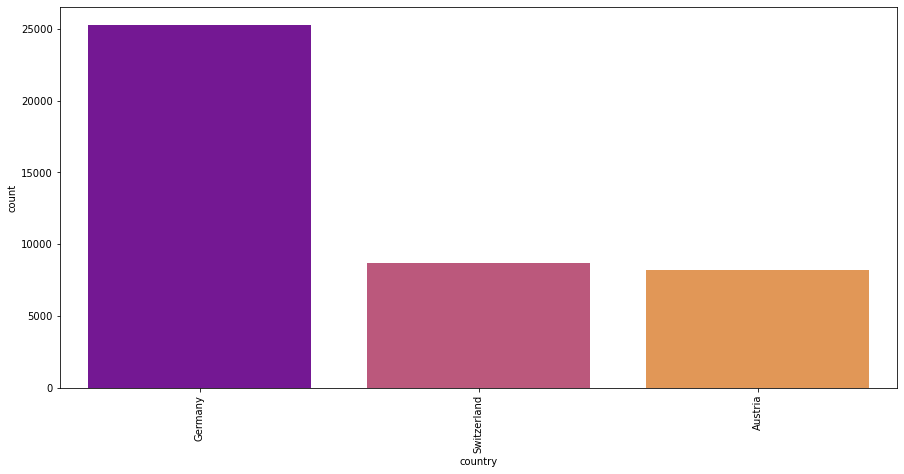

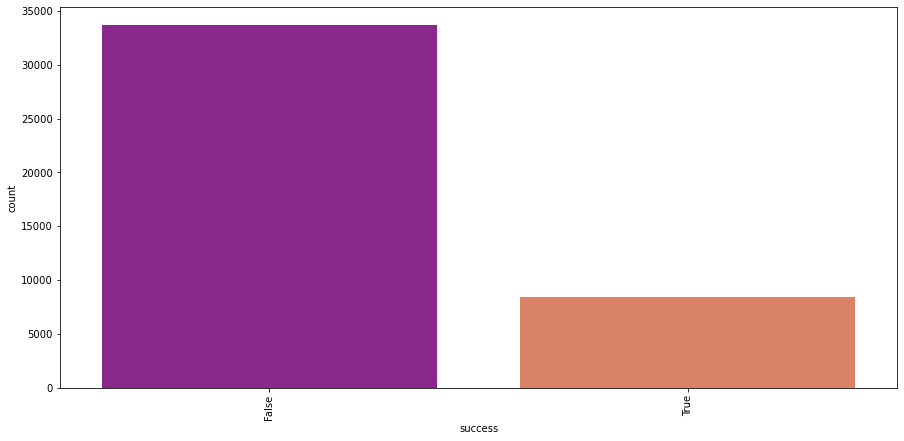

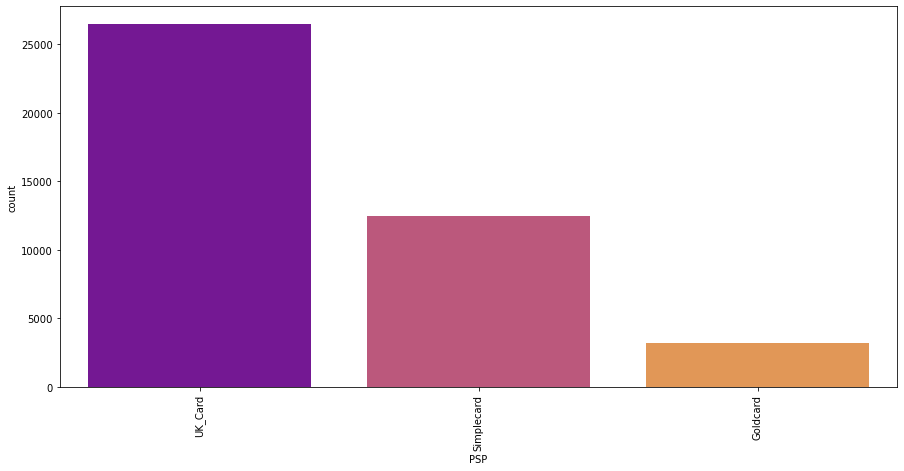

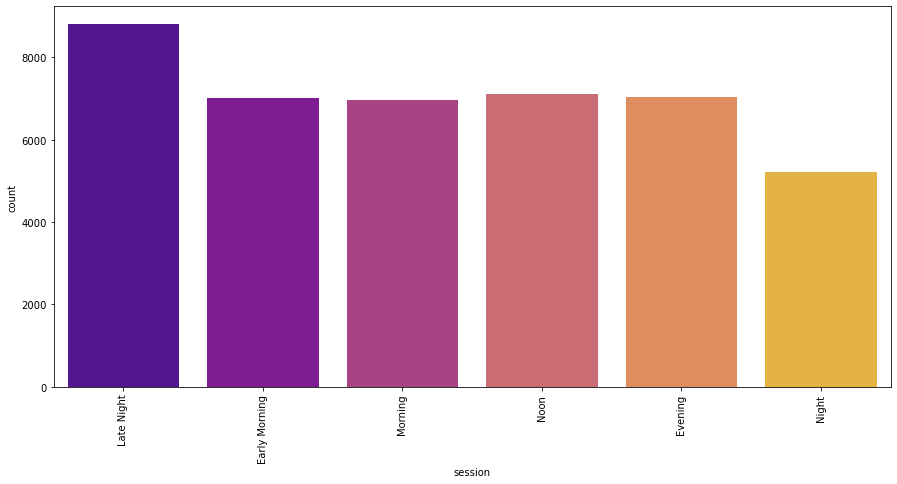

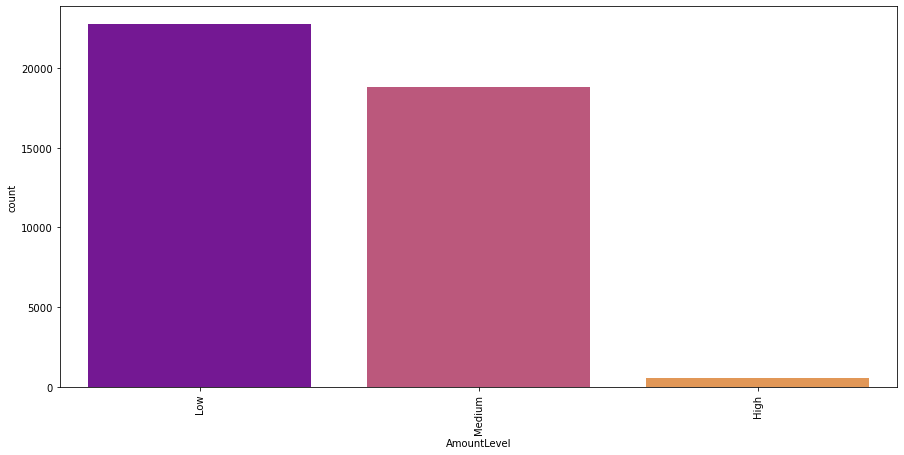

In [43]:
## plotting countplots:

def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(merged_df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['country', 'success','PSP','session', 'AmountLevel']
for col in toview:
    drawplot(col)

<AxesSubplot:>

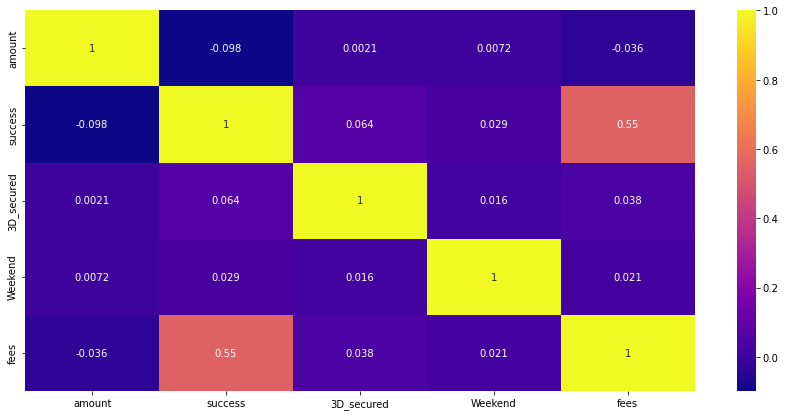

In [44]:
plt.figure(figsize=(15,7))
sns.heatmap(merged_df.corr(),annot=True,cmap='plasma')

In [45]:
merged_df.corr()['success']

amount       -0.097970
success       1.000000
3D_secured    0.063808
Weekend       0.029095
fees          0.548371
Name: success, dtype: float64

In [46]:
merged_df['amount'] = merged_df['amount'].astype('float')
merged_df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,session,Weekend,AmountLevel,fees
0,2019-01-01 00:01:11,Germany,89.0,False,UK_Card,False,Visa,Late Night,0,Low,1.0
1,2019-01-01 00:02:49,Germany,238.0,False,UK_Card,True,Diners,Late Night,0,Medium,1.0
2,2019-01-01 00:06:41,Switzerland,282.0,False,UK_Card,False,Master,Late Night,0,Medium,1.0
3,2019-01-01 00:12:52,Austria,232.0,False,UK_Card,True,Diners,Late Night,0,Medium,1.0
4,2019-01-01 00:13:34,Austria,232.0,False,UK_Card,True,Diners,Late Night,0,Medium,1.0


In [47]:
merged_df.corr()['success']

amount       -0.097970
success       1.000000
3D_secured    0.063808
Weekend       0.029095
fees          0.548371
Name: success, dtype: float64

<AxesSubplot:xlabel='success', ylabel='amount'>

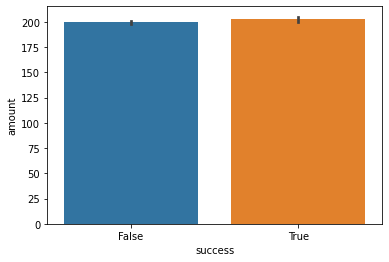

In [48]:
# impact of outlier or not

sns.barplot(merged_df['success'],df['amount'],estimator=np.median)

<AxesSubplot:xlabel='amount', ylabel='Density'>

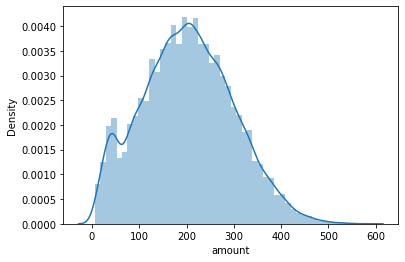

In [49]:
sns.distplot(merged_df['amount'])

In [50]:
merged_df['success'] = merged_df['success'].astype('int')
merged_df['3D_secured'] = merged_df['3D_secured'].astype('int')

In [51]:
merged_df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,session,Weekend,AmountLevel,fees
0,2019-01-01 00:01:11,Germany,89.0,0,UK_Card,0,Visa,Late Night,0,Low,1.0
1,2019-01-01 00:02:49,Germany,238.0,0,UK_Card,1,Diners,Late Night,0,Medium,1.0
2,2019-01-01 00:06:41,Switzerland,282.0,0,UK_Card,0,Master,Late Night,0,Medium,1.0
3,2019-01-01 00:12:52,Austria,232.0,0,UK_Card,1,Diners,Late Night,0,Medium,1.0
4,2019-01-01 00:13:34,Austria,232.0,0,UK_Card,1,Diners,Late Night,0,Medium,1.0


In [52]:
clist = ['tmsp','country','amount','PSP','3D_secured','card','session','Weekend','AmountLevel','fees','success']
dfnewx = merged_df[clist]
dfnew = dfnewx.copy()

In [53]:
dfnew.drop(columns=['tmsp'],inplace=True)

In [54]:
dfnew.head()

,country,amount,PSP,3D_secured,card,session,Weekend,AmountLevel,fees,success
0,Germany,89.0,UK_Card,0,Visa,Late Night,0,Low,1.0,0
1,Germany,238.0,UK_Card,1,Diners,Late Night,0,Medium,1.0,0
2,Switzerland,282.0,UK_Card,0,Master,Late Night,0,Medium,1.0,0
3,Austria,232.0,UK_Card,1,Diners,Late Night,0,Medium,1.0,0
4,Austria,232.0,UK_Card,1,Diners,Late Night,0,Medium,1.0,0


In [55]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42113 entries, 0 to 42112
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      42113 non-null  object 
 1   amount       42113 non-null  float64
 2   PSP          42113 non-null  object 
 3   3D_secured   42113 non-null  int32  
 4   card         42113 non-null  object 
 5   session      42113 non-null  object 
 6   Weekend      42113 non-null  int64  
 7   AmountLevel  42113 non-null  object 
 8   fees         42113 non-null  float64
 9   success      42113 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 4.2+ MB


In [56]:
dfnew['amount'] = dfnew['amount'].astype('int')
dfnew['fees'] = dfnew['fees'].astype('int')
dfnew.head()

,country,amount,PSP,3D_secured,card,session,Weekend,AmountLevel,fees,success
0,Germany,89,UK_Card,0,Visa,Late Night,0,Low,1,0
1,Germany,238,UK_Card,1,Diners,Late Night,0,Medium,1,0
2,Switzerland,282,UK_Card,0,Master,Late Night,0,Medium,1,0
3,Austria,232,UK_Card,1,Diners,Late Night,0,Medium,1,0
4,Austria,232,UK_Card,1,Diners,Late Night,0,Medium,1,0


# Model Building

In [57]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42113 entries, 0 to 42112
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      42113 non-null  object
 1   amount       42113 non-null  int32 
 2   PSP          42113 non-null  object
 3   3D_secured   42113 non-null  int32 
 4   card         42113 non-null  object
 5   session      42113 non-null  object
 6   Weekend      42113 non-null  int64 
 7   AmountLevel  42113 non-null  object
 8   fees         42113 non-null  int32 
 9   success      42113 non-null  int32 
dtypes: int32(4), int64(1), object(5)
memory usage: 3.9+ MB


In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
dfnew["country"] = le.fit_transform(dfnew["country"])
dfnew["card"] = le.fit_transform(dfnew["card"])
dfnew["PSP"] = le.fit_transform(dfnew["PSP"])
dfnew["session"] = le.fit_transform(dfnew["session"])
dfnew["AmountLevel"] = le.fit_transform(dfnew["AmountLevel"])

In [59]:
dfnew.head()

,country,amount,PSP,3D_secured,card,session,Weekend,AmountLevel,fees,success
0,1,89,2,0,2,2,0,1,1,0
1,1,238,2,1,0,2,0,2,1,0
2,2,282,2,0,1,2,0,2,1,0
3,0,232,2,1,0,2,0,2,1,0
4,0,232,2,1,0,2,0,2,1,0


In [60]:
dfnew.corr()['success']

country       -0.000272
amount        -0.097970
PSP           -0.075711
3D_secured     0.063808
card           0.010099
session        0.000156
Weekend        0.029095
AmountLevel   -0.098857
fees           0.556936
success        1.000000
Name: success, dtype: float64

In [61]:
dfnew.drop(columns=['session'],inplace=True)
dfnew.drop(columns=['country'],inplace=True)
dfnew.drop(columns=['card'],inplace=True)
dfnew.drop(columns=['Weekend'],inplace=True)

In [62]:
X = dfnew.iloc[:, :-1].values
y = dfnew.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [63]:
X = dfnew.drop(columns=['success'],inplace=True)

In [64]:
print(X_train)

[[ 91   1   0   1   0]
 [ 37   1   0   1   0]
 [461   2   0   0   1]
 ...
 [165   1   0   1   0]
 [246   2   0   2   1]
 [298   2   0   2   1]]


In [65]:
print(y_train)

[0 0 0 ... 0 0 0]


## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [67]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


# Evaluation

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6556  163]
 [ 399 1305]]


0.933277929478808